In [1]:
# Notebook: Regions plots
# Description: Plots TSS regions of AIM2 and DTX3L genes using all available kohorts.

In [2]:
%load_ext lab_black

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [4]:
def extract_region(df: pd.DataFrame, gene: str) -> pd.DataFrame:
    table = []

    selected = df[
        (df["UCSC_RefGene_Name"].str.contains(f"^{gene}|;{gene}"))
        & (df["UCSC_RefGene_Group"].str.contains("TSS200|TSS1500"))
    ]

    for idx, record in selected.iterrows():
        gene_loc = np.argwhere(
            np.array(record.loc["UCSC_RefGene_Name"].split(";")) == gene
        )

        gene_region = np.array(record.loc["UCSC_RefGene_Group"].split(";"))[gene_loc]
        gene_region = [name[0] for name in gene_region][0]
        table.append(
            {
                "CpG": idx,
                "UCSC_RefGene_Name": gene,
                "UCSC_RefGene_Group": gene_region,
                "MAPINFO": record.loc["MAPINFO"],
            }
        )

    table = pd.DataFrame(table).set_index("CpG")
    table = table[table["UCSC_RefGene_Group"].str.contains("TSS1500|TSS200")]
    return table.sort_values("MAPINFO")

In [5]:
# Load mynorm

In [6]:
mynorm = pd.read_csv("../data/processed/CorrectedMyNorms/mynorm_ALL.csv", index_col=0)

In [7]:
# EPIC manifest

In [8]:
epic = pd.read_csv(
    "../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    index_col=0,
    low_memory=False,
)

In [9]:
epic = epic[["UCSC_RefGene_Name", "UCSC_RefGene_Group", "MAPINFO", "CHR"]].dropna()
epic

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO,CHR
IlmnID,,,,
cg07881041,PTPRS;PTPRS;PTPRS;PTPRS,Body;Body;Body;Body,5236016.0,19
cg18478105,YTHDF1,TSS200,61847650.0,20
cg09835024,EIF2S3,TSS1500,24072640.0,X
cg05451842,ITPK1;ITPK1;ITPK1,Body;Body;Body,93581139.0,14
cg09838562,JARID2;JARID2-AS1;JARID2,TSS1500;Body;Body,15248173.0,6
...,...,...,...,...
cg10615271,ACVR1B,3'UTR,52388360.0,12
cg23079522,PPM1L,Body,160569628.0,3
cg16818145,MCCC1,Body,182782277.0,3


In [10]:
# Extract probes in AIM2 and DTX3L TSS200 or TSS1500

In [11]:
probes_aim = extract_region(epic, "AIM2")
probes_dtx = extract_region(epic, "DTX3L")

In [12]:
probes = pd.concat((probes_aim, probes_dtx))
probes

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO
CpG,,,
cg00490406,AIM2,TSS200,159046773.0
cg17217296,AIM2,TSS1500,159046937.0
cg10636246,AIM2,TSS1500,159046973.0
cg07195224,AIM2,TSS1500,159047034.0
cg17515347,AIM2,TSS1500,159047163.0
cg24145401,AIM2,TSS1500,159047177.0
cg22930808,DTX3L,TSS1500,122281881.0
cg08122652,DTX3L,TSS1500,122281939.0
cg00959259,DTX3L,TSS1500,122281975.0


In [13]:
# Overlap with mynorm

In [14]:
probes = probes.loc[set(probes.index).intersection(set(mynorm.index))].sort_values(
    "MAPINFO", ascending=True
)
probes

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO
CpG,,,
cg22930808,DTX3L,TSS1500,122281881.0
cg08122652,DTX3L,TSS1500,122281939.0
cg00959259,DTX3L,TSS1500,122281975.0
cg07815522,DTX3L,TSS1500,122282157.0
cg07916070,DTX3L,TSS200,122283003.0
cg19270099,DTX3L,TSS200,122283009.0
cg17804387,DTX3L,TSS200,122283011.0
cg11406875,DTX3L,TSS200,122283150.0
cg00490406,AIM2,TSS200,159046773.0


In [15]:
poi = pd.read_csv("../data/raw/CONCATED_ALL/SampleSheetALL.csv", index_col=0)
poi

,Sentrix_ID,Sentrix_Position,Sample_Group
Sample_Name,,,
GSM5331993,204776840051,R01C01,USA-Covid-19
GSM5331994,204776840051,R02C01,USA-Covid-19
GSM5331995,204776840051,R03C01,USA-Covid-19
GSM5331996,204776840051,R04C01,USA-Covid-19
GSM5331997,204776840051,R05C01,USA-Covid-19
...,...,...,...
HB_Control_78,201236480089,R02C01,HB
HB_Control_79,201236480089,R03C01,HB
HB_Control_80,201236480089,R04C01,HB


In [16]:
mynorm = pd.concat((mynorm.loc[probes.index, :].T, poi.Sample_Group), axis=1)

In [17]:
mynorm

,cg22930808,cg08122652,cg00959259,cg07815522,cg07916070,cg19270099,cg17804387,cg11406875,cg00490406,cg17217296,cg10636246,cg07195224,cg17515347,cg24145401,Sample_Group
GSM5163416,0.637160,0.728854,0.395479,0.647334,0.019204,0.021356,0.019401,0.144437,0.235565,0.734525,0.088756,0.076751,0.419931,0.380236,Spain
GSM5163665,0.510159,0.674567,0.418143,0.527278,0.021798,0.024287,0.043987,0.128983,0.276478,0.490873,0.072946,0.096045,0.301699,0.313996,Spain
HB_Control_55,0.627493,0.787955,0.471255,0.602792,0.010866,0.018967,0.029665,0.119306,0.423898,0.854952,0.128449,0.093570,0.572071,0.481278,HB
GSM5163545,0.503524,0.727455,0.364244,0.589694,0.018284,0.020537,0.029436,0.060715,0.471107,0.776332,0.255940,0.135384,0.542712,0.436718,Spain
GSM5163399,0.406343,0.644692,0.312626,0.568814,0.023894,0.021356,0.035844,0.176739,0.195373,0.391154,0.126567,0.124380,0.312061,0.244771,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5163752,0.399153,0.825397,0.527674,0.654826,0.009071,0.017472,0.029474,0.130794,0.176593,0.812566,0.112259,0.111311,0.446463,0.355273,Spain
GSM5163688,0.604678,0.796166,0.457730,0.675125,0.023846,0.025064,0.042051,0.175152,0.323722,0.816165,0.157456,0.098490,0.504882,0.445992,Spain
GSM5163557,0.558947,0.774172,0.502394,0.660683,0.019052,0.022194,0.028556,0.105240,0.358639,0.745067,0.150692,0.109192,0.549800,0.399131,Spain
GSM5163700,0.400886,0.666045,0.385934,0.528913,0.026071,0.030734,0.055243,0.129222,0.251576,0.665010,0.059079,0.081085,0.278247,0.251828,Spain


In [18]:
mynorm.Sample_Group.unique()

array(['Spain', 'HB', 'USA-Covid-19', 'USA-Non-Covid-19', 'PL'],
      dtype=object)

In [19]:
mynorm.Sample_Group = mynorm.Sample_Group.map(
    {
        "Spain": "COVID-19 ES",
        "HB": "Healthy",
        "USA-Covid-19": "COVID-19 USA",
        "USA-Non-Covid-19": "non-COVID-19 USA",
        "PL": "COVID-19 PL",
    }
)

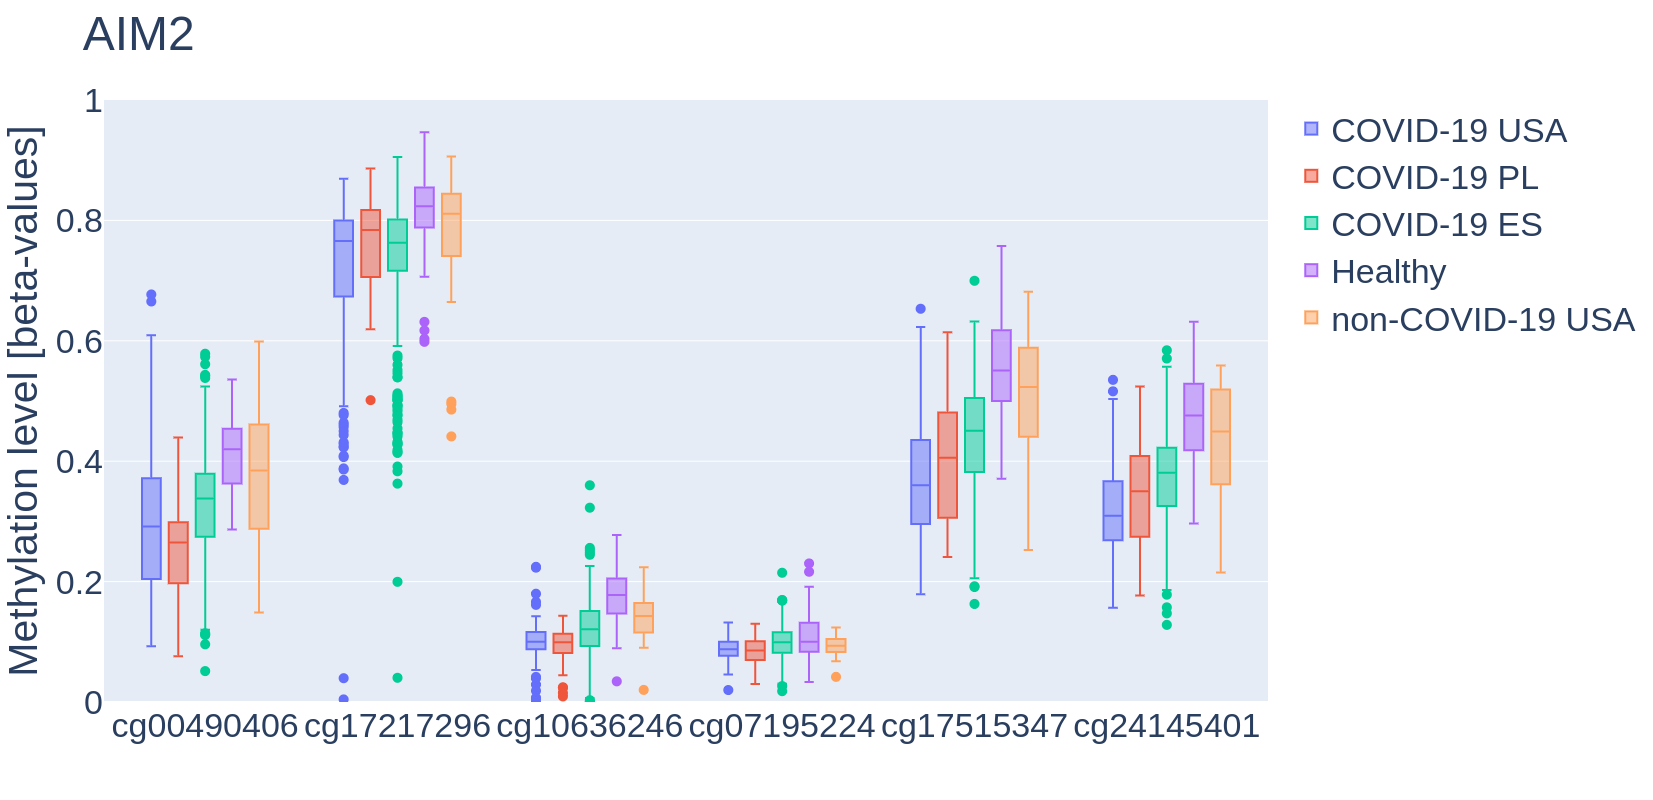

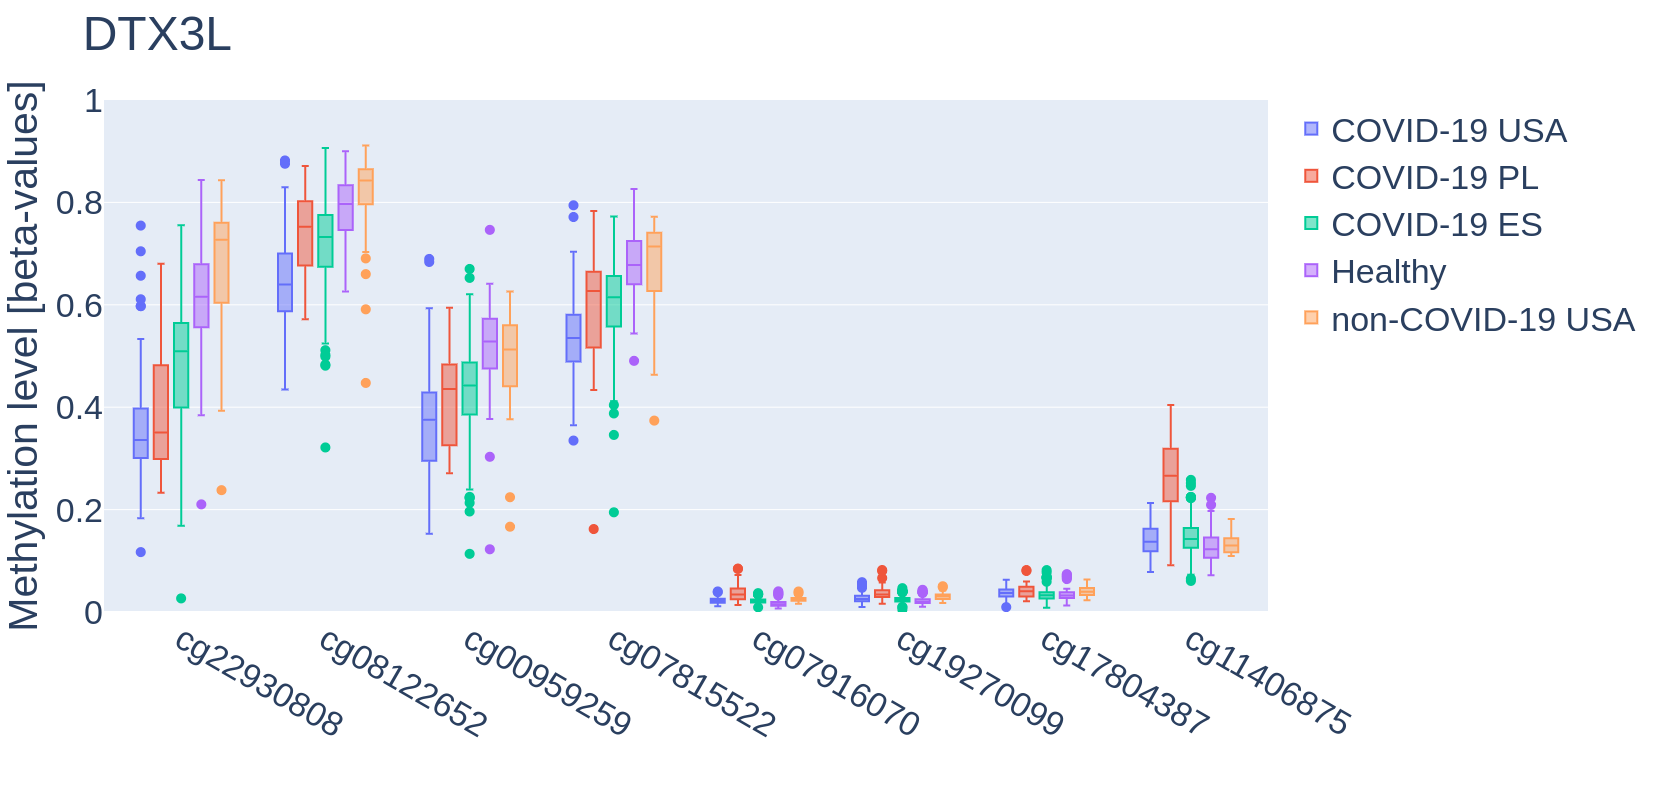

In [32]:
genes = ["AIM2", "DTX3L"]

for gene in genes:

    # Create plot
    fig = go.Figure()

    # Get porbes in TSS of gene and sort using MAPINFO
    data = probes[probes["UCSC_RefGene_Name"] == gene].index.tolist()
    data.append("Sample_Group")

    fig = px.box(
        mynorm[data],
        color="Sample_Group",
        labels={"value": "Methylation level [beta-values]", "variable": ""},
        range_y=[0, 1],
        title=f"{gene}",
        category_orders={
            "Sample_Group": [
                "COVID-19 USA",
                "COVID-19 PL",
                "COVID-19 ES",
                "Healthy",
                "Non-COVID-19 USA",
            ]
        },
    )

    fig.update_layout(
        legend=dict(font=dict(size=34), title=""),
        font=dict(size=34),
        width=2000,
        height=800,
    )

    fig.update_traces(marker=dict(size=10))

    fig.write_image(f"../Plots/Regions/{gene}.jpg")
    fig.show()